In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [4]:
type(data)

dict

In [5]:
import pandas as pd


# allows you to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
# normalizes the data

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11046,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.969876e+07,1.969876e+07,False,NaN,1,NaN,NaN,None,2024-05-15T20:34:00.000Z,66036.492491,3.758000e+10,32.5475,0.062667,7.230151,7.128205,4.175356,-1.686751,27.570951,1.300837e+12,54.5837,1.386766e+12,None,2024-05-15T20:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 20:35:23.692427
1,1027,Ethereum,ETH,ethereum,8933,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201167e+08,1.201167e+08,True,NaN,2,NaN,NaN,None,2024-05-15T20:33:00.000Z,3021.311762,1.391221e+10,11.5426,0.337139,4.350195,2.542967,-2.439701,-16.405231,6.654514,3.629101e+11,15.2183,3.629101e+11,None,2024-05-15T20:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 20:35:23.692427
2,825,Tether USDt,USDT,tether,85582,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.109523e+11,1.130866e+11,True,NaN,3,NaN,NaN,None,2024-05-15T20:33:00.000Z,1.000812,6.700873e+10,16.0736,-0.005203,0.133701,0.077648,0.038096,0.155194,-0.009890,1.110423e+11,4.6565,1.131783e+11,None,2024-05-15T20:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-15 20:35:23.692427
3,1839,BNB,BNB,bnb,2159,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475866e+08,1.475866e+08,False,NaN,4,NaN,NaN,None,2024-05-15T20:33:00.000Z,586.175079,1.868134e+09,-2.7951,-0.030691,3.246374,0.154765,5.415751,-0.091750,66.291118,8.651159e+10,3.6278,8.651159e+10,None,2024-05-15T20:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 20:35:23.692427
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.486563e+08,5.760098e+08,True,NaN,5,NaN,NaN,None,2024-05-15T20:33:00.000Z,155.489157,3.203184e+09,20.6257,0.765399,8.362292,9.002984,12.843648,-14.278935,36.679334,6.976119e+10,2.9254,8.956327e+10,None,2024-05-15T20:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 20:35:23.692427
5,3408,USDC,USDC,usd-coin,19112,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.312348e+10,3.312348e+10,False,NaN,6,NaN,NaN,None,2024-05-15T20:33:00.000Z,1.000098,7.681138e+09,33.1074,-0.010151,0.002481,-0.000262,0.015144,0.006693,0.006971,3.312673e+10,1.3891,3.312673e+10,None,2024-05-15T20:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-15 20:35:23.692427
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,None,2024-05-15T20:34:00.000Z,0.518410,1.106733e+09,4.3042,0.253597,2.688560,-0.217481,4.341597,-15.127961,-6.990608,2.869875e+10,1.2035,5.184100e+10,None,2024-05-15T20:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 20:35:23.692427
7,11419,Toncoin,TON,toncoin,325,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.474161e+09,5.106643e+09,True,NaN,8,3.414167e+09,2.390689e+10,None,2024-05-15T20:33:00.000Z,7.002262,3.223879e+08,-35.2967,0.209254,-0.087252,22.550778,4.900717,95.432752,217.252393,2.432698e+10,1.0218,3.575805e+10,None,2024-05-15T20:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 20:35:23.692427
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.44

In [7]:

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


    
    # Use this if you just want to keep it in a dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df = df.append(df2)


    # Use this if you want to create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df

    if not os.path.isfile(r'C:\Users\jeanb\Desktop\PF-Website\Crypto API\API.csv'):
        df.to_csv(r'C:\Users\jeanb\Desktop\PF-Website\Crypto API\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\jeanb\Desktop\PF-Website\Crypto API\API.csv', mode='a', header=False)
        
    #Then to read in the file: df = pd.read_csv(r'C:\Users\jeanb\Desktop\PF-Website\Crypto API\API.csv')



In [8]:
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [9]:
df72 = pd.read_csv(r'C:\Users\jeanb\Desktop\PF-Website\Crypto API\API.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11046,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.969876e+07,1.969876e+07,False,NaN,1,NaN,NaN,NaN,2024-05-15T20:34:00.000Z,66036.492491,3.758000e+10,32.5475,0.062667,7.230151,7.128205,4.175356,-1.686751,27.570951,1.300837e+12,54.5837,1.386766e+12,NaN,2024-05-15T20:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 20:35:31.067424
1,1,1027,Ethereum,ETH,ethereum,8933,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201167e+08,1.201167e+08,True,NaN,2,NaN,NaN,NaN,2024-05-15T20:33:00.000Z,3021.311762,1.391221e+10,11.5426,0.337139,4.350195,2.542967,-2.439701,-16.405231,6.654514,3.629101e+11,15.2183,3.629101e+11,NaN,2024-05-15T20:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 20:35:31.067424
2,2,825,Tether USDt,USDT,tether,85582,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.109523e+11,1.130866e+11,True,NaN,3,NaN,NaN,NaN,2024-05-15T20:33:00.000Z,1.000812,6.700873e+10,16.0736,-0.005203,0.133701,0.077648,0.038096,0.155194,-0.009890,1.110423e+11,4.6565,1.131783e+11,NaN,2024-05-15T20:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-15 20:35:31.067424
3,3,1839,BNB,BNB,bnb,2159,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.475866e+08,1.475866e+08,False,NaN,4,NaN,NaN,NaN,2024-05-15T20:33:00.000Z,586.175079,1.868134e+09,-2.7951,-0.030691,3.246374,0.154765,5.415751,-0.091750,66.291118,8.651159e+10,3.6278,8.651159e+10,NaN,2024-05-15T20:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 20:35:31.067424
4,4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.486563e+08,5.760098e+08,True,NaN,5,NaN,NaN,NaN,2024-05-15T20:33:00.000Z,155.489157,3.203184e+09,20.6257,0.765399,8.362292,9.002984,12.843648,-14.278935,36.679334,6.976119e+10,2.9254,8.956327e+10,NaN,2024-05-15T20:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 20:35:31.067424
5,5,3408,USDC,USDC,usd-coin,19112,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.312348e+10,3.312348e+10,False,NaN,6,NaN,NaN,NaN,2024-05-15T20:33:00.000Z,1.000098,7.681138e+09,33.1074,-0.010151,0.002481,-0.000262,0.015144,0.006693,0.006971,3.312673e+10,1.3891,3.312673e+10,NaN,2024-05-15T20:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-15 20:35:31.067424
6,6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.535918e+10,9.998763e+10,False,NaN,7,NaN,NaN,NaN,2024-05-15T20:34:00.000Z,0.518410,1.106733e+09,4.3042,0.253597,2.688560,-0.217481,4.341597,-15.127961,-6.990608,2.869875e+10,1.2035,5.184100e+10,NaN,2024-05-15T20:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 20:35:31.067424
7,7,11419,Toncoin,TON,toncoin,325,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,3.474161e+09,5.106643e+09,True,NaN,8,3.414167e+09,2.390689e+10,NaN,2024-05-15T20:33:00.000Z,7.002262,3.223879e+08,-35.2967,0.209254,-0.087252,22.550778,4.900717,95.432752,217.252393,2.432698e+10,1.0218,3.575805e+10,NaN,2024-05-15T20:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-15 20:35:31.067424
8,8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha

In [37]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19696478.00000,19696478.00000,False,nan,1,nan,nan,None,2024-05-10T16:11:00.000Z,60880.83379,27276442577.40832,7.91880,0.12402,-2.44750,-1.53860,-11.54877,-15.71402,28.66639,1199138003333.61694,53.46430,1278497509555.06006,None,2024-05-10T16:11:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-10 16:12:35.330983
1,1027,Ethereum,ETH,ethereum,8911,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120107309.98633,120107309.98633,True,nan,2,nan,nan,None,2024-05-10T16:10:00.000Z,2921.44262,11294017545.03421,0.79530,-0.47974,-3.07392,-5.12978,-16.11676,-27.36973,17.28283,350886614567.86957,15.62640,350886614567.87000,None,2024-05-10T16:10:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-10 16:12:35.330983
2,825,Tether USDt,USDT,tether,85098,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",nan,110955976510.79590,113086550461.08403,True,nan,3,nan,nan,None,2024-05-10T16:10:00.000Z,0.99968,49354672876.02176,7.14180,-0.01325,0.00184,-0.05997,-0.02527,-0.11658,-0.07582,110920261464.07925,4.93970,113050149614.91000,None,2024-05-10T16:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-10 16:12:35.330983
3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,147587000.00178,147587000.00178,False,nan,4,nan,nan,None,2024-05-10T16:10:00.000Z,586.71877,1533498183.57905,-20.46590,0.14372,-1.96327,1.31162,-1.82659,13.71865,82.50504,86592062591.56590,3.84870,86592062591.57001,None,2024-05-10T16:10:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-10 16:12:35.330983
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",nan,448256546.12765,575703433.27585,True,nan,5,nan,nan,None,2024-05-10T16:10:00.000Z,147.00962,2481657928.04996,7.90120,0.26892,-0.29726,3.39570,-12.61401,-0.21160,35.45546,65898022638.65751,2.92890,84633940556.80000,None,2024-05-10T16:10:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-10 16:12:35.330983
5,3408,USDC,USDC,usd-coin,19020,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,33100621183.80460,33100621183.80460,False,nan,6,nan,nan,None,2024-05-10T16:10:00.000Z,0.99991,5741800381.71401,12.23830,-0.00542,-0.01977,-0.01038,-0.01929,-0.00494,-0.01477,33097541216.60238,1.47110,33097541216.60000,None,2024-05-10T16:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-10 16:12:35.330983
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55359176420.00000,99987633657.00000,False,nan,7,nan,nan,None,2024-05-10T16:11:00.000Z,0.50128,1066047162.10493,3.93340,0.38528,-3.26771,-4.83945,-17.40511,-27.34649,-4.05801,27750432262.15397,1.23340,50127971651.20000,None,2024-05-10T16:11:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-10 16:12:35.330983
7,11419,Toncoin,TON,toncoin,315,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",nan,3473780265.82753,5106402363.25713,True,nan,8,3414166606.00000,23013580542.44018,None,2024-05-10T16:10:00.000Z,6.74061,766769037.60752,117.80040,-0.08554,7.10289,22.40468,-1.07319,119.00930,223.32734,23415413235.50782,1.04280,34420289233.22000,None

In [38]:
# change the scientific notation

pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [39]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11041,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19696478.00000,19696478.00000,False,nan,1,nan,nan,None,2024-05-10T16:11:00.000Z,60880.83379,27276442577.40832,7.91880,0.12402,-2.44750,-1.53860,-11.54877,-15.71402,28.66639,1199138003333.61694,53.46430,1278497509555.06006,None,2024-05-10T16:11:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-10 16:12:35.330983
1,1027,Ethereum,ETH,ethereum,8911,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",nan,120107309.98633,120107309.98633,True,nan,2,nan,nan,None,2024-05-10T16:10:00.000Z,2921.44262,11294017545.03421,0.79530,-0.47974,-3.07392,-5.12978,-16.11676,-27.36973,17.28283,350886614567.86957,15.62640,350886614567.87000,None,2024-05-10T16:10:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-10 16:12:35.330983
2,825,Tether USDt,USDT,tether,85098,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",nan,110955976510.79590,113086550461.08403,True,nan,3,nan,nan,None,2024-05-10T16:10:00.000Z,0.99968,49354672876.02176,7.14180,-0.01325,0.00184,-0.05997,-0.02527,-0.11658,-0.07582,110920261464.07925,4.93970,113050149614.91000,None,2024-05-10T16:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-10 16:12:35.330983
3,1839,BNB,BNB,bnb,2155,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",nan,147587000.00178,147587000.00178,False,nan,4,nan,nan,None,2024-05-10T16:10:00.000Z,586.71877,1533498183.57905,-20.46590,0.14372,-1.96327,1.31162,-1.82659,13.71865,82.50504,86592062591.56590,3.84870,86592062591.57001,None,2024-05-10T16:10:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-10 16:12:35.330983
4,5426,Solana,SOL,solana,657,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",nan,448256546.12765,575703433.27585,True,nan,5,nan,nan,None,2024-05-10T16:10:00.000Z,147.00962,2481657928.04996,7.90120,0.26892,-0.29726,3.39570,-12.61401,-0.21160,35.45546,65898022638.65751,2.92890,84633940556.80000,None,2024-05-10T16:10:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-10 16:12:35.330983
5,3408,USDC,USDC,usd-coin,19020,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",nan,33100621183.80460,33100621183.80460,False,nan,6,nan,nan,None,2024-05-10T16:10:00.000Z,0.99991,5741800381.71401,12.23830,-0.00542,-0.01977,-0.01038,-0.01929,-0.00494,-0.01477,33097541216.60238,1.47110,33097541216.60000,None,2024-05-10T16:10:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-10 16:12:35.330983
6,52,XRP,XRP,xrp,1314,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55359176420.00000,99987633657.00000,False,nan,7,nan,nan,None,2024-05-10T16:11:00.000Z,0.50128,1066047162.10493,3.93340,0.38528,-3.26771,-4.83945,-17.40511,-27.34649,-4.05801,27750432262.15397,1.23340,50127971651.20000,None,2024-05-10T16:11:00.000Z,nan,NaN,NaN,NaN,NaN,2024-05-10 16:12:35.330983
7,11419,Toncoin,TON,toncoin,315,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",nan,3473780265.82753,5106402363.25713,True,nan,8,3414166606.00000,23013580542.44018,None,2024-05-10T16:10:00.000Z,6.74061,766769037.60752,117.80040,-0.08554,7.10289,22.40468,-1.07319,119.00930,223.32734,23415413235.50782,1.04280,34420289233.22000,None

In [40]:
# look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.23693,-2.31830,-1.37599,-11.37682,-15.65718,28.85467
Ethereum,-0.37498,-3.06991,-5.11337,-16.08308,-27.34240,17.33792
Tether USDt,-0.00900,0.01070,-0.05645,-0.03118,-0.11703,-0.07470
BNB,0.23047,-1.93261,1.34152,-1.85381,13.72822,82.56956
Solana,0.53900,-0.23878,3.57364,-12.51983,-0.08729,35.75534
USDC,0.00243,-0.01088,-0.00652,-0.01946,-0.00086,-0.01178
XRP,0.46864,-3.23094,-4.76754,-17.37178,-27.28135,-4.01595
Toncoin,0.16657,7.13318,22.48812,-0.97874,118.83155,223.61631
Dogecoin,0.23181,-3.64139,3.51090,-25.22233,-16.82252,78.35825


In [41]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.23693
              quote.USD.percent_change_24h    -2.31830
              quote.USD.percent_change_7d     -1.37599
              quote.USD.percent_change_30d   -11.37682
              quote.USD.percent_change_60d   -15.65718
              quote.USD.percent_change_90d    28.85467
Ethereum      quote.USD.percent_change_1h     -0.37498
              quote.USD.percent_change_24h    -3.06991
              quote.USD.percent_change_7d     -5.11337
              quote.USD.percent_change_30d   -16.08308
              quote.USD.percent_change_60d   -27.34240
              quote.USD.percent_change_90d    17.33792
Tether USDt   quote.USD.percent_change_1h     -0.00900
              quote.USD.percent_change_24h     0.01070
              quote.USD.percent_change_7d     -0.05645
              quote.USD.percent_change_30d    -0.03118
              quote.USD.percent_change_60d    -0.11703
              quote.US

In [42]:
type(df4)

pandas.core.series.Series

In [43]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.23693
             quote.USD.percent_change_24h  -2.31830
             quote.USD.percent_change_7d   -1.37599
             quote.USD.percent_change_30d -11.37682
             quote.USD.percent_change_60d -15.65718
             quote.USD.percent_change_90d  28.85467
Ethereum     quote.USD.percent_change_1h   -0.37498
             quote.USD.percent_change_24h  -3.06991
             quote.USD.percent_change_7d   -5.11337
             quote.USD.percent_change_30d -16.08308
             quote.USD.percent_change_60d -27.34240
             quote.USD.percent_change_90d  17.33792
Tether USDt  quote.USD.percent_change_1h   -0.00900
             quote.USD.percent_change_24h   0.01070
             quote.USD.percent_change_7d   -0.05645
             quote.USD.percent_change_30d  -0.03118
             quote.USD.percent_change_60d  -0.11703
             quote.USD.percent_change_90d  -0.07470
BNB          quote.USD.percent_change_1h    0.23047
             quote.USD.percent_change_24h  -1.93261
             quote.USD.percent_change_7d    1.34152
             quote.USD.percent_change_30d  -1.85381
             quote.USD.percent_change_60d  13.72822
             quote.USD.percent_change_90d  82.56956
Solana       quote.USD.percent_change_1h    0.53900
             quote.USD.percent_change_24h  -0.23878
             quote.USD.percent_change_7d    3.57364
             quote.USD.percent_change_30d -12.51983
             quote.USD.percent_change_60d  -0.08729
             quote.USD.percent_change_90d  35.75534
USDC         quote.USD.percent_change_1h    0.00243
             quote.USD.percent_change_24h  -0.01088
             quote.USD.percent_change_7d   -0.00652
             quote.USD.percent_change_30d  -0.01946
             quote.USD.percent_change_60d  -0.00086
             quote.USD.percent_change_90d  -0.01178
XRP          quote.USD.percent_change_1h    0.46864
             quote.USD.percent_change_24h  -3.23094
             quote.USD.percent_change_7d   -4.76754
             quote.USD.percent_change_30d -17.37178
             quote.USD.percent_change_60d -27.28135
             quote.USD.percent_change_90d  -4.01595
Toncoin      quote.USD.percent_change_1h    0.16657
             quote.USD.percent_change_24h   7.13318
             quote.USD.percent_change_7d   22.48812
             quote.USD.percent_change_30d  -0.97874
             quote.USD.percent_change_60d 118.83155
             quote.USD.percent_change_90d 223.61631
Dogecoin     quote.USD.percent_change_1h    0.23181
             quote.USD.percent_change_24h  -3.64139
             quote.USD.percent_change_7d    3.51090
             quote.USD.percent_change_30d -25.22233
             quote.USD.percent_change_60d -16.82252
             quote.USD.percent_change_90d  78.35825
Cardano      quote.USD.percent_change_1h   -0.10729
             quote.USD.percent_change_24h  -1.89864
             quote.USD.percent_change_7d   -4.15552
             quote.USD.percent_change_30d -21.91510
             quote.USD.percent_change_60d -40.92933
             quote.USD.percent_change_90d -16.56189
Shiba Inu    quote.USD.percent_change_1h   -0.02685
             quote.USD.percent_change_24h  -4.32348
             quote.USD.percent_change_7d   -7.28828
             quote.USD.percent_change_30d -19.57585
             quote.USD.percent_change_60d -31.30756
             quote.USD.percent_change_90d 139.12491
Avalanche    quote.USD.percent_change_1h    0.40426
             quote.USD.percent_change_24h  -0.42170
             quote.USD.percent_change_7d   -2.26734
             quote.USD.percent_change_30d -26.26182
             quote.USD.percent_change_60d -26.78162
             quote.USD.percent_change_90d -12.26200
TRON         quote.USD.percent_change_1h    0.37141
             quote.USD.percent_change_24h  -0.23858
             quote.USD.percent_change_7d    2.19050
             quote.USD.percent_change_30d

In [44]:
df5.count()

values    90
dtype: int64

In [45]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.reset_index()
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.23693
1,Bitcoin,quote.USD.percent_change_24h,-2.31830
2,Bitcoin,quote.USD.percent_change_7d,-1.37599
3,Bitcoin,quote.USD.percent_change_30d,-11.37682
4,Bitcoin,quote.USD.percent_change_60d,-15.65718
5,Bitcoin,quote.USD.percent_change_90d,28.85467
6,Ethereum,quote.USD.percent_change_1h,-0.37498
7,Ethereum,quote.USD.percent_change_24h,-3.06991
8,Ethereum,quote.USD.percent_change_7d,-5.11337
9,Ethereum,quote.USD.percent_change_30d,-16.08308


In [46]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.23693
1,Bitcoin,quote.USD.percent_change_24h,-2.31830
2,Bitcoin,quote.USD.percent_change_7d,-1.37599
3,Bitcoin,quote.USD.percent_change_30d,-11.37682
4,Bitcoin,quote.USD.percent_change_60d,-15.65718
5,Bitcoin,quote.USD.percent_change_90d,28.85467
6,Ethereum,quote.USD.percent_change_1h,-0.37498
7,Ethereum,quote.USD.percent_change_24h,-3.06991
8,Ethereum,quote.USD.percent_change_7d,-5.11337
9,Ethereum,quote.USD.percent_change_30d,-16.08308


In [47]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.23693
1,Bitcoin,24h,-2.31830
2,Bitcoin,7d,-1.37599
3,Bitcoin,30d,-11.37682
4,Bitcoin,60d,-15.65718
5,Bitcoin,90d,28.85467
6,Ethereum,quote.USD.percent_change_1h,-0.37498
7,Ethereum,24h,-3.06991
8,Ethereum,7d,-5.11337
9,Ethereum,30d,-16.08308


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

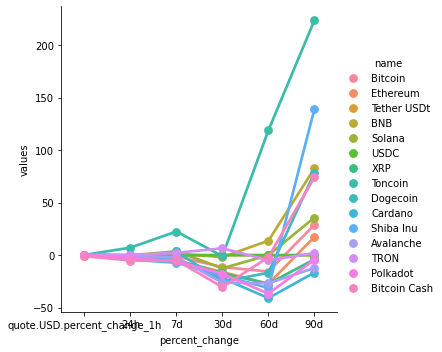

In [49]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [50]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,60880.83379,2024-05-10 16:12:35.330983
0,Bitcoin,60880.83379,2024-05-10 16:12:55.224832
0,Bitcoin,60880.83379,2024-05-10 16:13:55.450631
0,Bitcoin,61034.10139,2024-05-10 16:14:55.753805
0,Bitcoin,61093.82746,2024-05-10 16:15:55.968882
0,Bitcoin,61067.22447,2024-05-10 16:16:56.199532


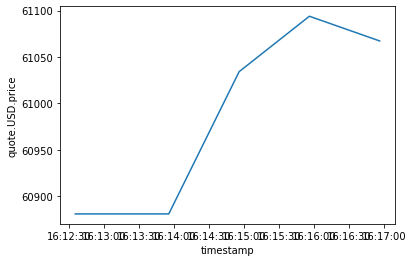

In [52]:

sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)